## Notebook 3: Data Cleaning & Preprocessing (Heart Disease Dataset)

In this notebook, we prepare the raw **Heart Disease UCI dataset** for machine learning.  

Medical datasets often contain missing values, invalid entries (e.g., zeros in blood pressure), and mixed datatypes. 

Cleaning and preprocessing ensures that:

- The dataset is consistent and reliable,  
  
- Statistical assumptions are respected,  
  
- Downstream models (Notebook 4) can be trained without bias or artifacts.  

## Workflow Overview

1. Load raw dataset (reproducibility)  
   
2. Initial exploratory data analysis (EDA) 
    
3. Handle invalid zeros & missing values
   
4. Impute numeric and categorical features
   
5. Encode categorical variables
   
6. Binarize target variable  
   
7. Engineer new features  

8. Correlation analysis
   
9.  Save cleaned dataset for modeling  

By the end of this notebook, we will have a **fully cleaned dataset** saved in `outputs/datasets/cleaned/`, ready for 

modeling.


---

In [10]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Output directories
os.makedirs("outputs/figures/data_cleaning", exist_ok=True)
os.makedirs("outputs/datasets/cleaned", exist_ok=True)

# Plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [11]:
## Step 3.1 — Load Raw Dataset

input_path = Path("/workspaces/Heart_disease_risk_predictor/inputs/datasets/raw/heart_disease_uci.csv")
df = pd.read_csv(input_path)
print(f"Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
display(df.head())

Dataset loaded: 920 rows × 16 columns


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [12]:
## Step 3.2 — Initial EDA

print(df.info())
display(df.describe(include='all').transpose())
print("\nMissing values per column (raw):\n", df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,920.0,NaN,NaN,NaN,460.5,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,NaN,NaN,NaN,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
sex,920,2,Male,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,920,4,Cleveland,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,920,4,asymptomatic,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,861.0,NaN,NaN,NaN,132.132404,19.06607,0.0,120.0,130.0,140.0,200.0
chol,890.0,NaN,NaN,NaN,199.130337,110.78081,0.0,175.0,223.0,268.0,603.0
fbs,830,2,False,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,918,3,normal,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalch,865.0,NaN,NaN,NaN,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0



Missing values per column (raw):
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


/tmp/ipykernel_21537/3014241903.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


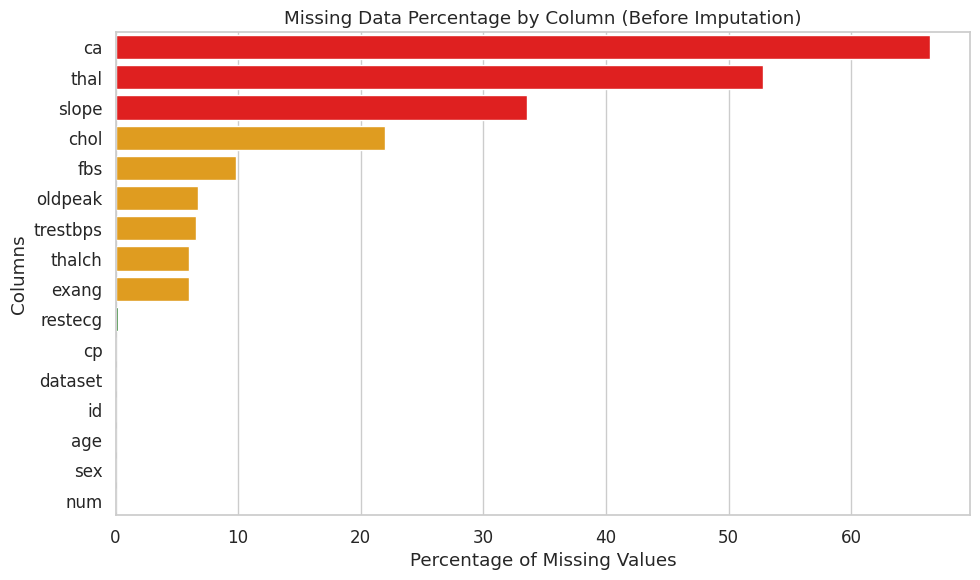

In [13]:
## Step 3.3 — Replace Invalid Zeros & Missingness Adjustment

for col in ['trestbps','chol']:
    if col in df.columns:
        df[col] = df[col].replace(0, np.nan)

missing_percent = (df.isna().sum()/len(df))*100
low_threshold, high_threshold = 5, 25
low_missing    = missing_percent[missing_percent <= low_threshold]
medium_missing = missing_percent[(missing_percent>low_threshold) & (missing_percent<=high_threshold)]
high_missing   = missing_percent[missing_percent>high_threshold]

plt.figure(figsize=(10,6))
ordered = missing_percent.sort_values(ascending=False)
sns.barplot(
    x=ordered.values,
    y=ordered.index,
    palette=['red' if val>high_threshold else 'orange' if val>low_threshold else 'green' for val in ordered.values]
)
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Data Percentage by Column (Before Imputation)")
plt.tight_layout()
plt.show()

In [14]:
## Step 3.4 — Drop Columns Based on Missingness Policy

to_drop = [c for c in high_missing.index.tolist() if c not in {"chol"}]
df = df.drop(columns=to_drop)


In [15]:
## Step 3.5 — Imputation

num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
if 'num' in num_cols:
    num_cols.remove('num')  # exclude target

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[num_cols] = imputer_num.fit_transform(df[num_cols])
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

print("Remaining missing values:\n", df.isna().sum())


Remaining missing values:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


In [16]:
## Step 3.6 — Encode Categorical Variables

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("One-hot encoding complete! New shape:", df_encoded.shape)


One-hot encoding complete! New shape: (920, 18)


In [17]:
## Step 3.7 — Binarize Target

df_encoded["HeartDisease"] = (df_encoded["num"]>0).astype(int)
df_encoded = df_encoded.drop(columns=["num"])


In [18]:
## Step 3.8 — Feature Engineering

df_encoded['chol_age_ratio'] = df_encoded['chol']/df_encoded['age']
df_encoded['oldpeak_thalach_ratio'] = df_encoded['oldpeak']/(df_encoded['thalch']+1e-5)
df_encoded['age_trestbps'] = df_encoded['age']*df_encoded['trestbps']
df_encoded['thalch_oldpeak'] = df_encoded['thalch']*df_encoded['oldpeak']
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=[29,40,50,60,70,80], labels=False)



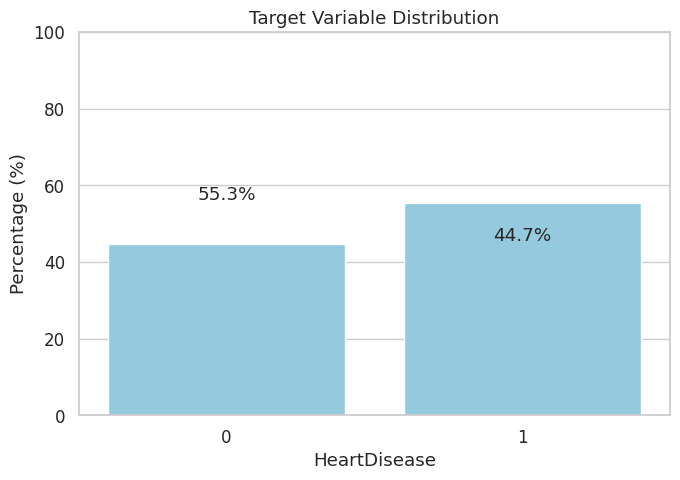

/tmp/ipykernel_21537/981447006.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_encoded.groupby(f"{col}_bin")['HeartDisease']


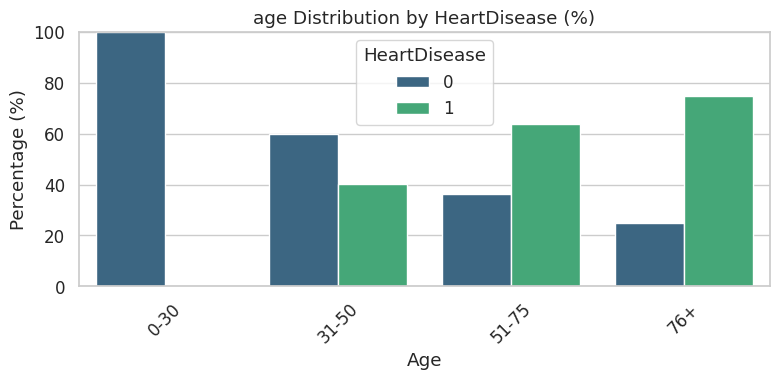

/tmp/ipykernel_21537/981447006.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_encoded.groupby(f"{col}_bin")['HeartDisease']


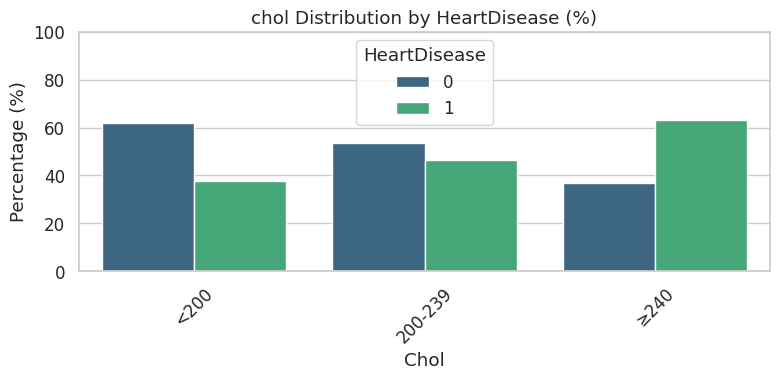

/tmp/ipykernel_21537/981447006.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_encoded.groupby(f"{col}_bin")['HeartDisease']


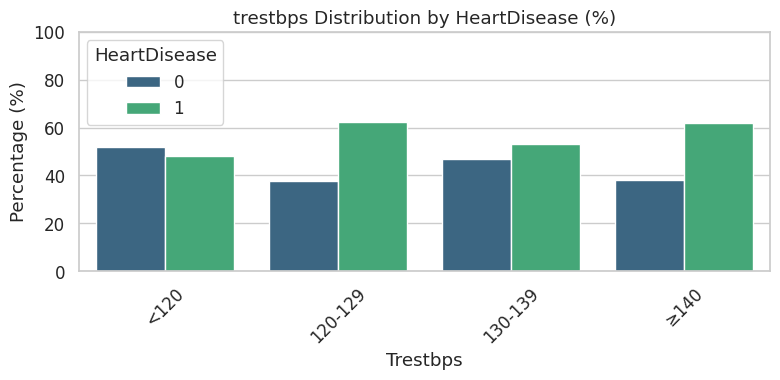

/tmp/ipykernel_21537/981447006.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_encoded.groupby(f"{col}_bin")['HeartDisease']


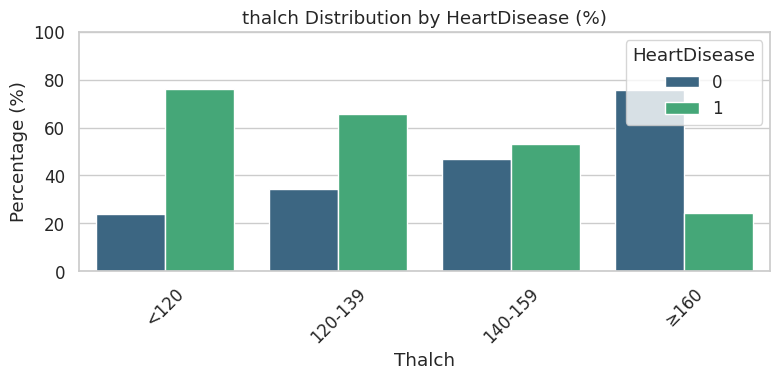

/tmp/ipykernel_21537/981447006.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_encoded.groupby(f"{col}_bin")['HeartDisease']


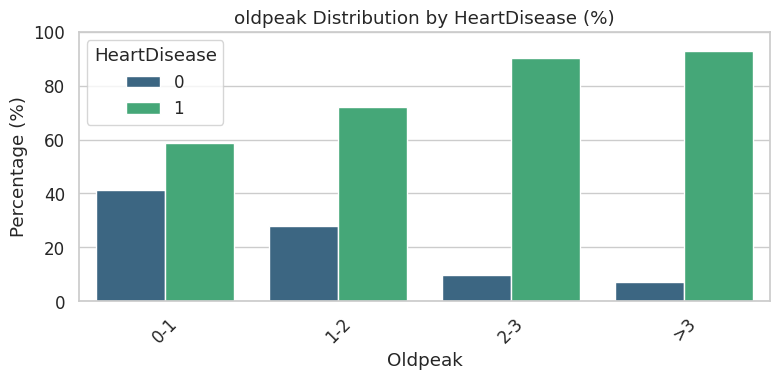

In [19]:
## Step 3.9 — Target Distribution & Binned Features

target_percent = df_encoded["HeartDisease"].value_counts(normalize=True) * 100
target_labels = target_percent.index

plt.figure(figsize=(7,5))
ax = sns.barplot(x=target_labels, y=target_percent.values, color="skyblue")
for i, pct in enumerate(target_percent.values):
    ax.text(i, pct + 1, f"{pct:.1f}%", ha='center')
plt.title("Target Variable Distribution")
plt.xlabel("HeartDisease")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("outputs/figures/data_cleaning/target_distribution.png")
plt.show()

# Binned numeric features
bins_dict = {
    "age": [0, 30, 50, 75, 100],
    "chol": [0, 200, 239, 1000],
    "trestbps": [0, 120, 129, 139, 200],
    "thalch": [0, 120, 139, 159, 220],
    "oldpeak": [0, 1, 2, 3, 10]
}

labels_dict = {
    "age": ["0-30", "31-50", "51-75", "76+"],
    "chol": ["<200", "200-239", "≥240"],
    "trestbps": ["<120","120-129","130-139","≥140"],
    "thalch": ["<120","120-139","140-159","≥160"],
    "oldpeak": ["0-1","1-2","2-3",">3"]
}

for col in bins_dict.keys():
    df_encoded[f"{col}_bin"] = pd.cut(df_encoded[col], bins=bins_dict[col], labels=labels_dict[col])
    cat_percentages = (
        df_encoded.groupby(f"{col}_bin")['HeartDisease']
        .value_counts(normalize=True)
        .mul(100)
        .rename("percentage")
        .reset_index()
    )
    plt.figure(figsize=(8,4))
    sns.barplot(
        data=cat_percentages,
        x=f"{col}_bin", y="percentage",
        hue="HeartDisease",
        palette='viridis',
        order=labels_dict[col]
    )
    plt.title(f"{col} Distribution by HeartDisease (%)")
    plt.ylabel("Percentage (%)")
    plt.xlabel(col.capitalize())
    plt.ylim(0,100)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"outputs/figures/data_cleaning/{col}_binned_distribution.png")
    plt.show()


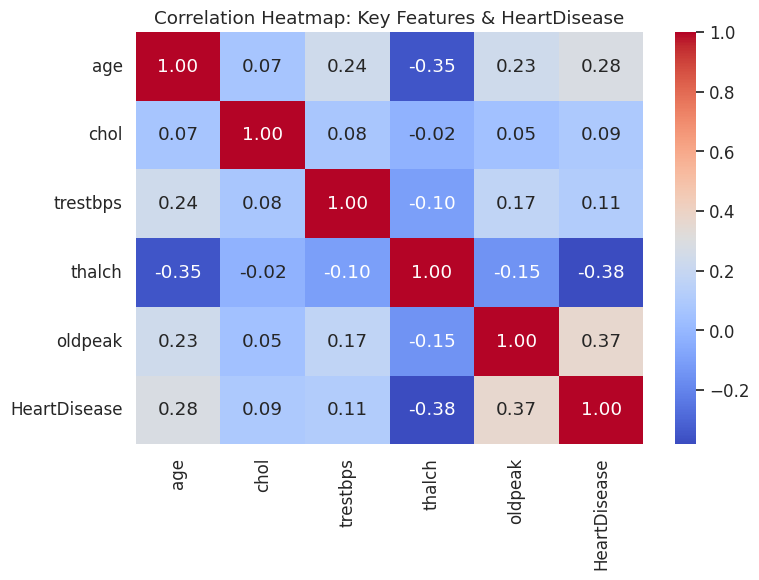

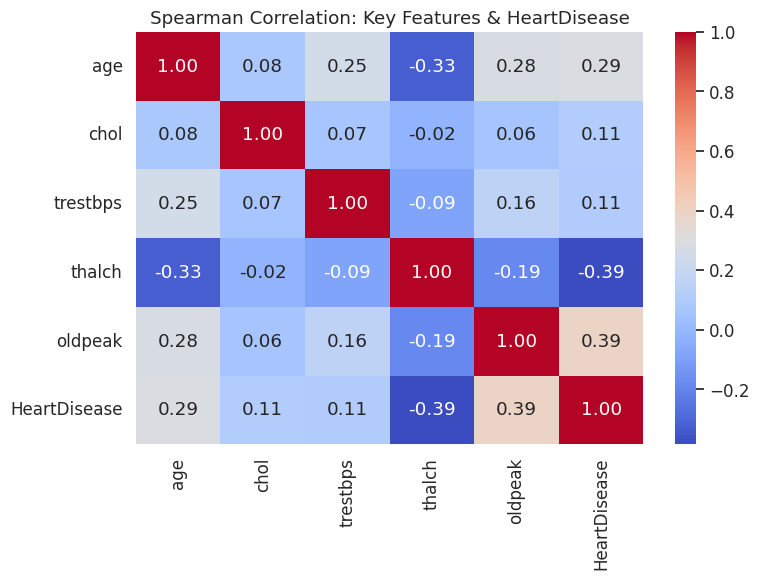

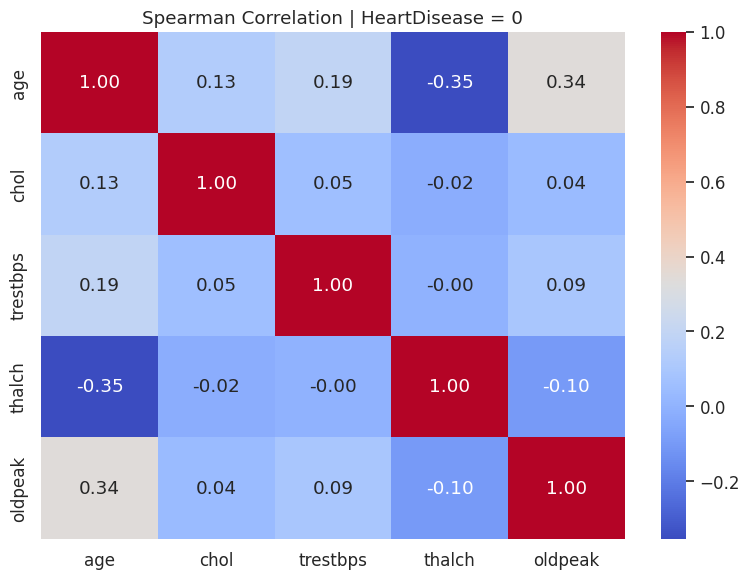

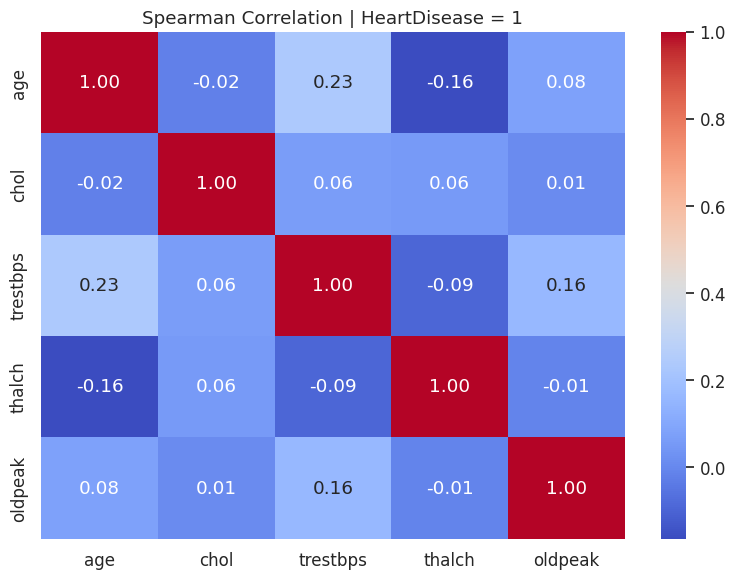

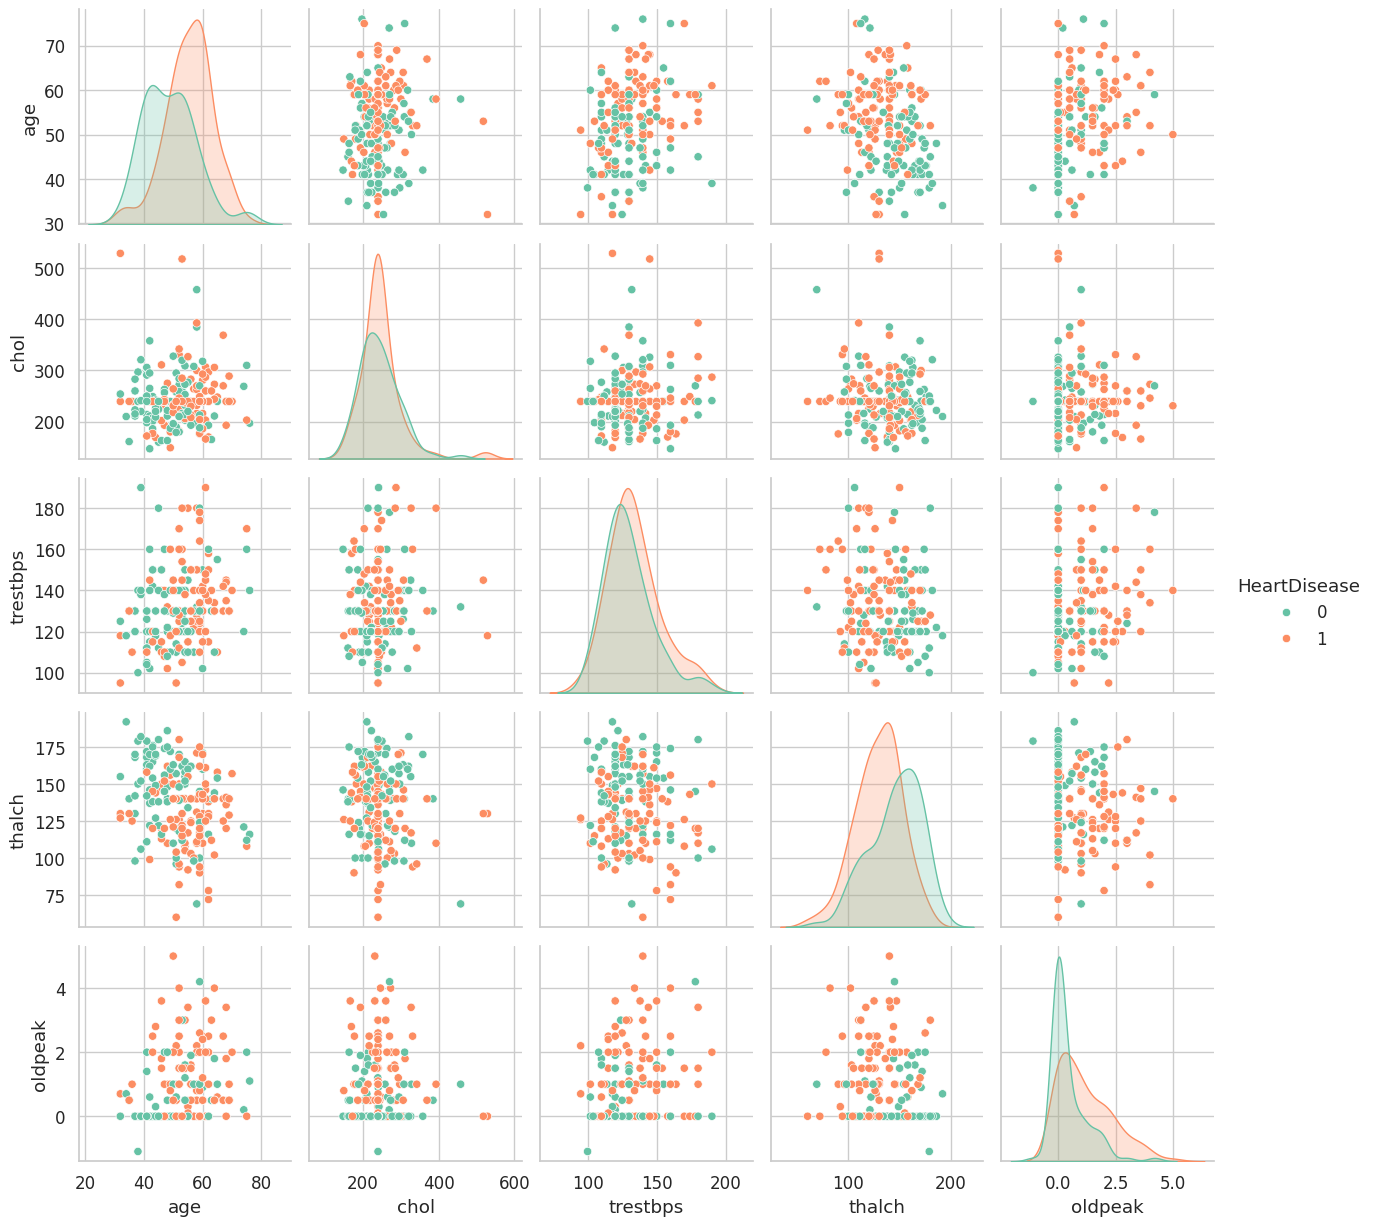

In [24]:
## Step 3.10 — Correlation Analysis (Pearson & Spearman)

# %%
key_features = ['age', 'chol', 'trestbps', 'thalch', 'oldpeak', 'HeartDisease']

# Pearson
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded[key_features].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Key Features & HeartDisease")
plt.tight_layout()
plt.savefig("outputs/figures/data_cleaning/key_features_heatmap.png")
plt.show()

# Spearman
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded[key_features].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation: Key Features & HeartDisease")
plt.tight_layout()
plt.savefig("outputs/figures/data_cleaning/key_features_spearman.png")
plt.show()

# By class Spearman
for label in sorted(df_encoded['HeartDisease'].unique()):
    subset = df_encoded[df_encoded['HeartDisease']==label][key_features[:-1]]
    plt.figure(figsize=(8,6))
    sns.heatmap(subset.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Spearman Correlation | HeartDisease = {label}")
    plt.tight_layout()
    plt.savefig(f"outputs/figures/data_cleaning/spearman_class_{label}.png")
    plt.show()

# Pairplot (downsample)
sns.pairplot(df_encoded.sample(200), vars=key_features[:-1], hue='HeartDisease', diag_kind='kde', palette='Set2')
plt.savefig("outputs/figures/data_cleaning/pairplot.png")
plt.show()

In [ ]:
## Step 3.11 — Save Cleaned Dataset

# %%
df_encoded.to_csv("outputs/datasets/cleaned/heart_disease_cleaned.csv", index=False)
print("Cleaned dataset saved at outputs/datasets/cleaned/heart_disease_cleaned.csv")